<a href="https://colab.research.google.com/github/VIVEKPATIL12/DS_Combined/blob/main/sub_classification_3_cate_37_Accuracy_ProbabilityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
import zipfile

In [13]:
zip_ref = zipfile.ZipFile('/content/RSCD_300_images_per_Category.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [14]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

classes = [
    "water_asphalt_severe",
    "water_asphalt_slight",
    "water_asphalt_smooth",
    "water_concrete_severe",
    "water_concrete_slight",
    "water_concrete_smooth",
    "water_gravel",
    "water_mud",
    "wet_asphalt_severe",
    "wet_asphalt_slight",
    "wet_asphalt_smooth",
    "wet_concrete_severe",
    "wet_concrete_slight",
    "wet_concrete_smooth",
    "wet_gravel",
    "wet_mud",
    "dry_asphalt_severe",
    "dry_asphalt_slight",
    "dry_asphalt_smooth",
    "dry_concrete_severe",
    "dry_concrete_slight",
    "dry_concrete_smooth",
    "dry_gravel",
    "dry_mud",
    "fresh_snow",
    "ice",
    "melted_snow"
] # replace with your actual class names
data_dir = '/content/RSCD_300_images_per_Category'
train_dir = '/content/train/'
test_dir = '/content/test/'

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for cls in classes:
    # Create class-specific train and test directories
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

    # Get a list of all image files for this class
    image_files = os.listdir(os.path.join(data_dir, cls))

    # Split the files into train and test sets
    train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)  # 80% train, 20% test

    # Copy the train files into the train directory
    for file in train_files:
        shutil.copy(os.path.join(data_dir, cls, file), os.path.join(train_dir, cls, file))

    # Copy the test files into the test directory
    for file in test_files:
        shutil.copy(os.path.join(data_dir, cls, file), os.path.join(test_dir, cls, file))




In [15]:
# Train the Model
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import scipy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')




Found 6480 images belonging to 27 classes.
Found 1620 images belonging to 27 classes.


In [16]:
# Load the VGG16 network, ensuring the head FC layer sets are left off
baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=tf.keras.Input(shape=(224, 224, 3)))

# Construct the head of the model that will be placed on top of the base model
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dense(27, activation="softmax")(headModel)  # Change the number here according to your number of classes

# Place the head FC model on top of the base model (this will become the actual model we will train)
model = tf.keras.Model(inputs=baseModel.input, outputs=headModel)

# Loop over all layers in the base model and freeze them so they will not be updated during the training process
for layer in baseModel.layers:
    layer.trainable = False

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# # Train the model
# model.fit(train_generator, validation_data=test_generator, epochs=2)

# # Save the model
# model.save('model.h5')




58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

model.fit(train_generator, validation_data=test_generator, epochs=50, callbacks=[early_stopping, model_checkpoint])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


203/203 ━━━━━━━━━━━━━━━━━━━━ 68s 253ms/step - accuracy: 0.1613 - loss: 2.9352 - val_accuracy: 0.2506 - val_loss: 2.4837
Epoch 2/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 55s 191ms/step - accuracy: 0.3332 - loss: 2.2154 - val_accuracy: 0.2932 - val_loss: 2.3083
Epoch 3/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 38s 178ms/step - accuracy: 0.4170 - loss: 1.9206 - val_accuracy: 0.2735 - val_loss: 2.2893
Epoch 4/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 36s 174ms/step - accuracy: 0.4956 - loss: 1.7313 - val_accuracy: 0.3488 - val_loss: 2.1000
Epoch 5/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 40s 168ms/step - accuracy: 0.5462 - loss: 1.5569 - val_accuracy: 0.3457 - val_loss: 2.1312
Epoch 6/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 34s 168ms/step - accuracy: 0.5785 - loss: 1.4627 - val_accuracy: 0.3475 - val_loss: 2.1160
Epoch 7/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 48s 204ms/step - accuracy: 0.6245 - loss: 1.3224 - val_accuracy: 0.3747 - val_loss: 2.0585
Epoch 8/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 36s 176ms/step - accuracy: 0.6556 - loss: 1.2300 - val

Found 1620 images belonging to 27 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step


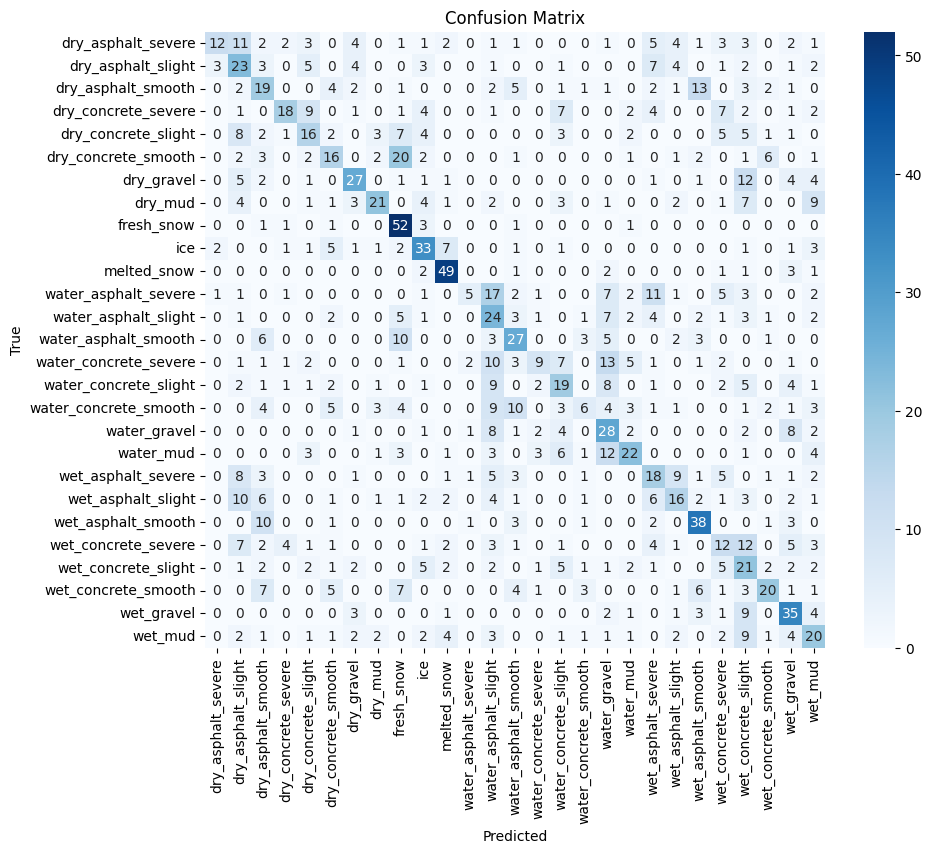

                       precision    recall  f1-score   support

   dry_asphalt_severe       0.67      0.20      0.31        60
   dry_asphalt_slight       0.26      0.38      0.31        60
   dry_asphalt_smooth       0.25      0.32      0.28        60
  dry_concrete_severe       0.60      0.30      0.40        60
  dry_concrete_slight       0.33      0.27      0.30        60
  dry_concrete_smooth       0.33      0.27      0.30        60
           dry_gravel       0.53      0.45      0.49        60
              dry_mud       0.60      0.35      0.44        60
           fresh_snow       0.45      0.87      0.59        60
                  ice       0.46      0.55      0.50        60
          melted_snow       0.67      0.82      0.74        60
 water_asphalt_severe       0.50      0.08      0.14        60
 water_asphalt_slight       0.22      0.40      0.29        60
 water_asphalt_smooth       0.40      0.45      0.42        60
water_concrete_severe       0.45      0.15      0.23  

In [18]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Load the test data
test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


Found 1620 images belonging to 27 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Streaming output truncated to the last 5000 lines.
wet_asphalt_severe : 0.04522143
wet_asphalt_slight : 0.036391553
wet_asphalt_smooth : 0.08624648
wet_concrete_severe : 0.014248249
wet_concrete_slight : 0.010018126
wet_concrete_smooth : 0.04020607
wet_gravel : 0.005827022
wet_mud : 0.032480113

True Class: wet_concrete_smooth
Predicted Class: wet_concrete_smooth
Predicted Probabilities:
dry_asphalt_severe : 0.0035253693
dry_asphalt_slight : 0.010827194
dry_asphalt_smooth : 0.022439217
dry_concrete_severe : 0.0024836322
dry_concrete_slight : 0.0050788657
dry_concrete_smooth : 0.19572972
dry_gravel : 0.00029324752
dry_mud : 0.0032377967
fresh_snow : 0.020241411
ice : 0.0071379947
melted_snow : 0.00023609042
water_asphalt_severe : 0.006871454
water_asphalt_slight : 0.046128374
water_asphalt_smooth : 0.082336985
water_concrete_severe : 0.011599964
water_concrete_slight : 0.0063420082
water_concrete_smooth : 0.23243952
water_gravel : 0.00928202
water_mud : 0.0093610035
wet_asphalt_severe :

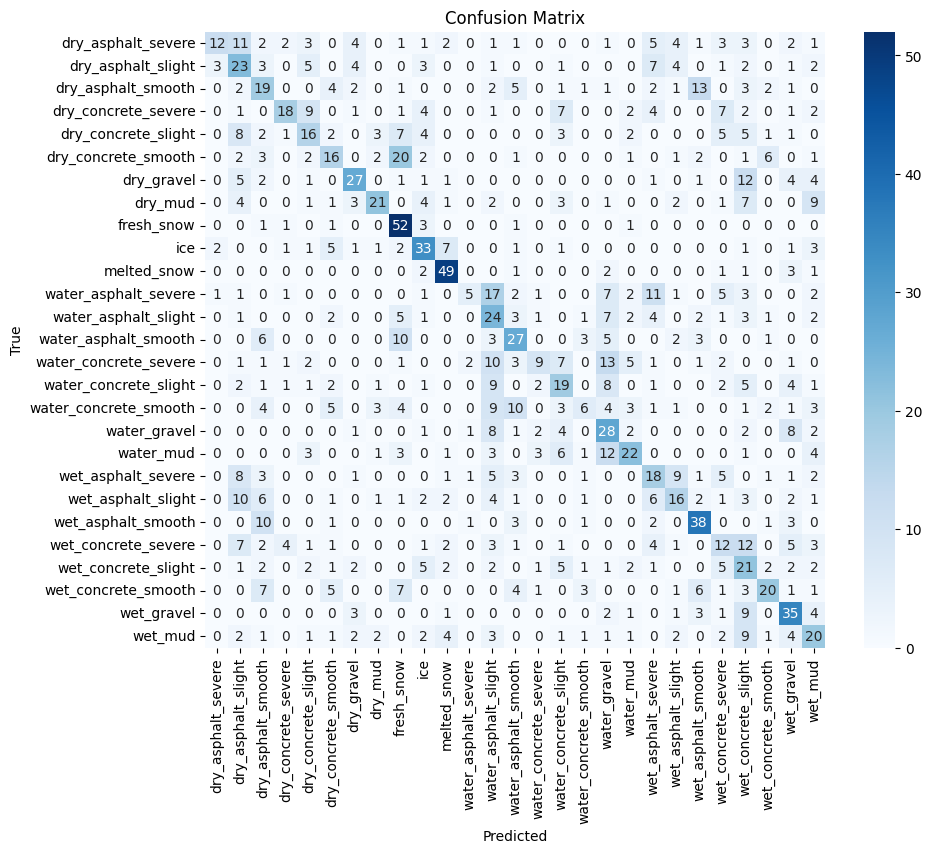

                       precision    recall  f1-score   support

   dry_asphalt_severe       0.67      0.20      0.31        60
   dry_asphalt_slight       0.26      0.38      0.31        60
   dry_asphalt_smooth       0.25      0.32      0.28        60
  dry_concrete_severe       0.60      0.30      0.40        60
  dry_concrete_slight       0.33      0.27      0.30        60
  dry_concrete_smooth       0.33      0.27      0.30        60
           dry_gravel       0.53      0.45      0.49        60
              dry_mud       0.60      0.35      0.44        60
           fresh_snow       0.45      0.87      0.59        60
                  ice       0.46      0.55      0.50        60
          melted_snow       0.67      0.82      0.74        60
 water_asphalt_severe       0.50      0.08      0.14        60
 water_asphalt_slight       0.22      0.40      0.29        60
 water_asphalt_smooth       0.40      0.45      0.42        60
water_concrete_severe       0.45      0.15      0.23  

In [19]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Load the test data
test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Get predicted probability values for each class
predicted_probabilities = predictions

# Print predicted probability values for each class
for i in range(len(true_classes)):
    print("True Class:", class_labels[true_classes[i]])
    print("Predicted Class:", class_labels[predicted_classes[i]])
    print("Predicted Probabilities:")
    for j in range(len(class_labels)):
        print(class_labels[j], ":", predicted_probabilities[i][j])
    print()

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Found 1620 images belonging to 27 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step


ValueError: num must be an integer with 1 <= num <= 30, not 31

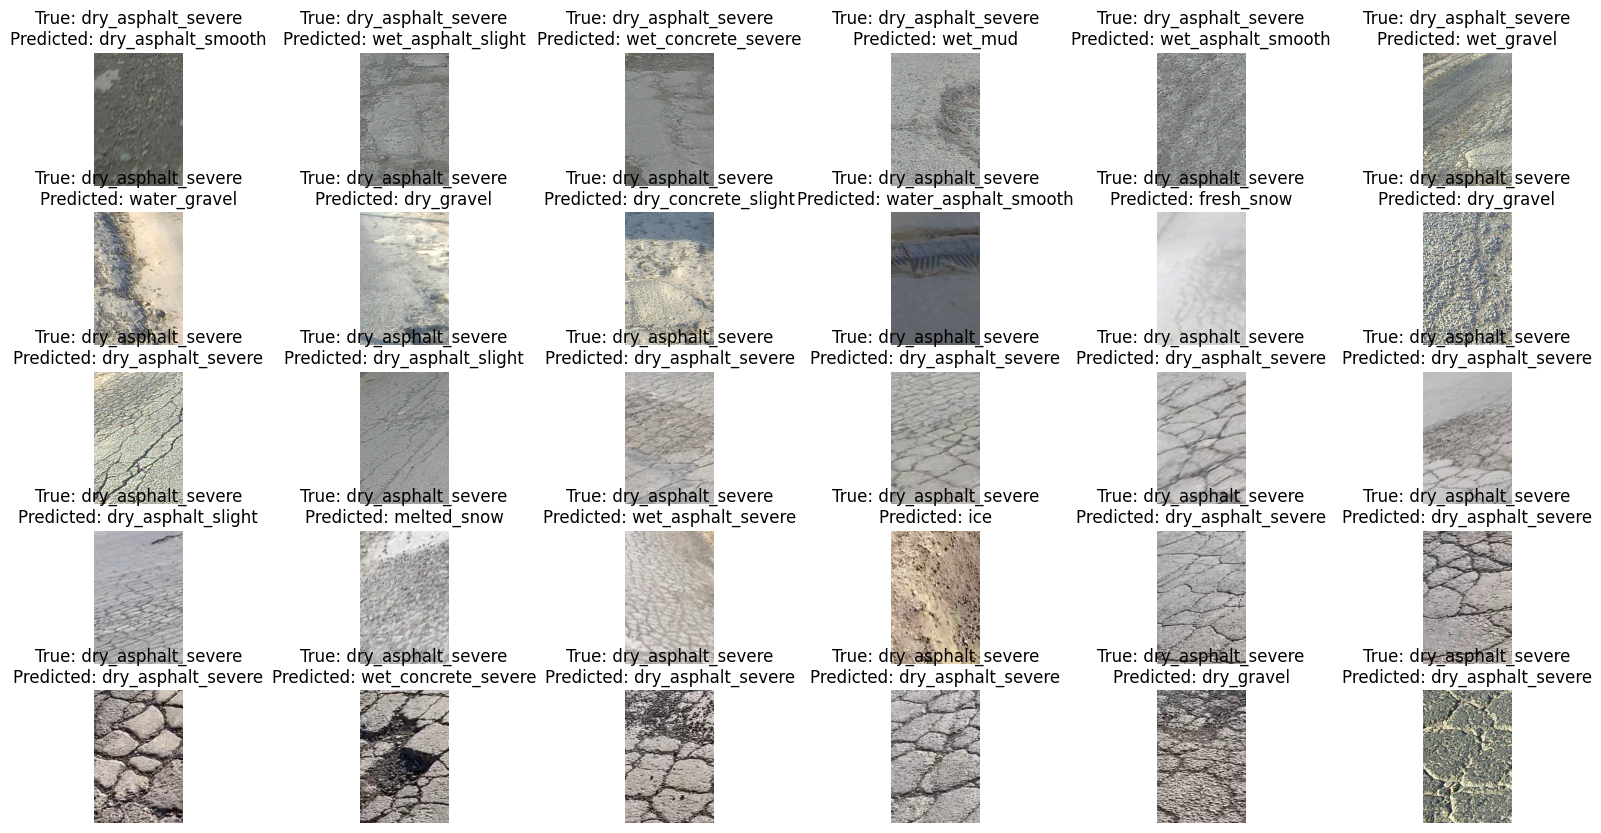

In [20]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Load the test data
test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Get the paths of the test images
test_paths = test_generator.filepaths

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Get predicted probability values for each class
predicted_probabilities = predictions

# Plot images and their predicted probabilities
plt.figure(figsize=(20, 10))
for i in range(len(true_classes)):
    plt.subplot(5, 6, i+1)
    img_path = test_paths[i]
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title("True: " + class_labels[true_classes[i]] + "\nPredicted: " + class_labels[predicted_classes[i]])
    plt.axis('off')
plt.show()

# Print predicted probability values for each class
for i in range(len(true_classes)):
    print("True Class:", class_labels[true_classes[i]])
    print("Predicted Class:", class_labels[predicted_classes[i]])
    print("Predicted Probabilities:")
    for j in range(len(class_labels)):
        print(class_labels[j], ":", predicted_probabilities[i][j])
    print()

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Found 1620 images belonging to 27 classes.
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step


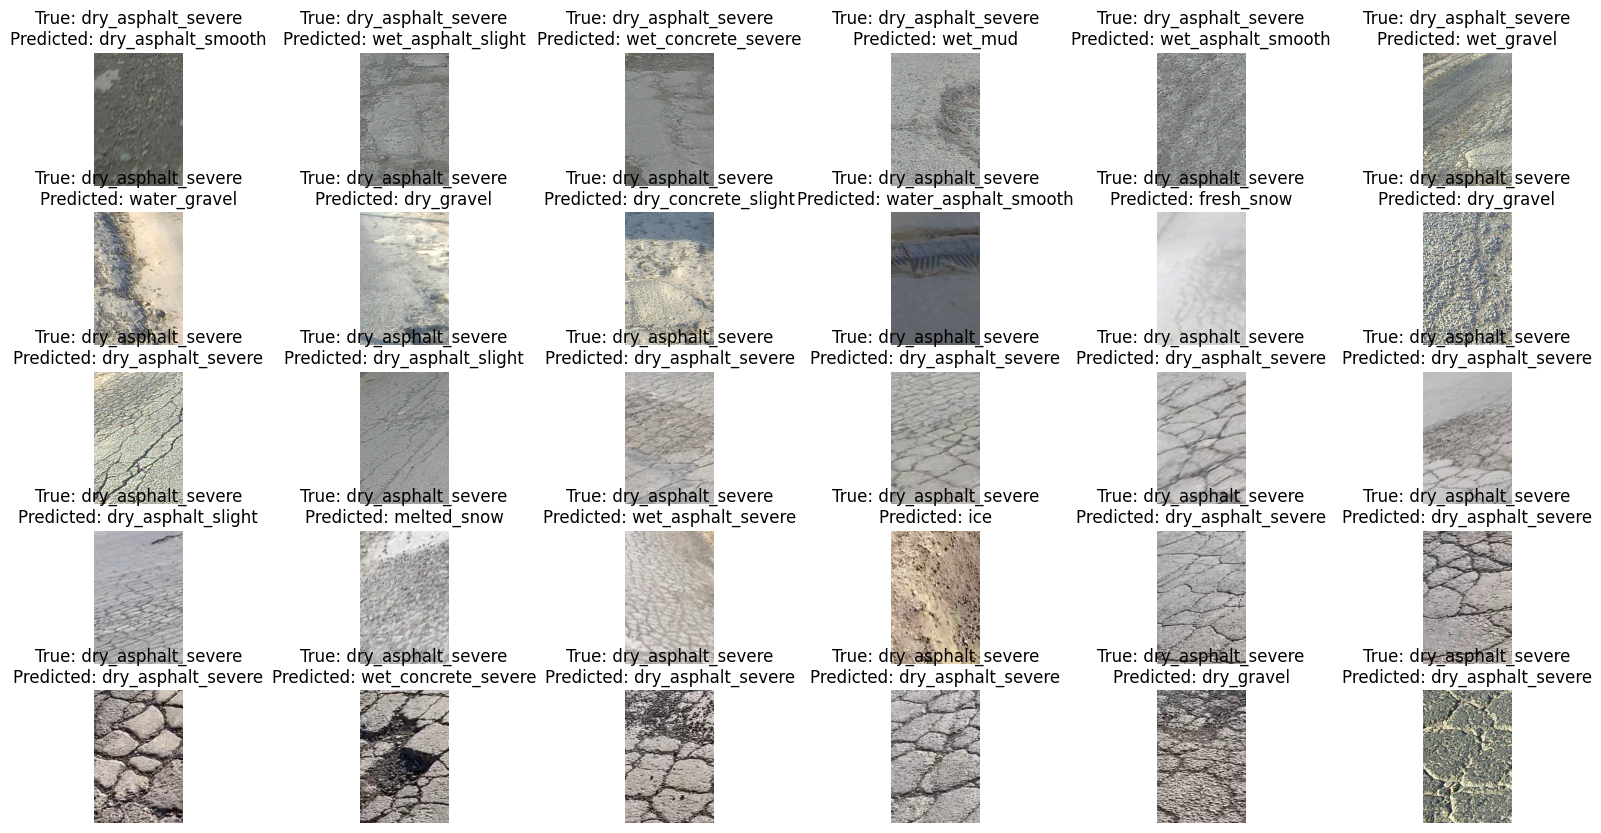

Streaming output truncated to the last 5000 lines.
wet_asphalt_severe : 0.04522143
wet_asphalt_slight : 0.036391553
wet_asphalt_smooth : 0.08624648
wet_concrete_severe : 0.014248249
wet_concrete_slight : 0.010018126
wet_concrete_smooth : 0.04020607
wet_gravel : 0.005827022
wet_mud : 0.032480113

True Class: wet_concrete_smooth
Predicted Class: wet_concrete_smooth
Predicted Probabilities:
dry_asphalt_severe : 0.0035253693
dry_asphalt_slight : 0.010827194
dry_asphalt_smooth : 0.022439217
dry_concrete_severe : 0.0024836322
dry_concrete_slight : 0.0050788657
dry_concrete_smooth : 0.19572972
dry_gravel : 0.00029324752
dry_mud : 0.0032377967
fresh_snow : 0.020241411
ice : 0.0071379947
melted_snow : 0.00023609042
water_asphalt_severe : 0.006871454
water_asphalt_slight : 0.046128374
water_asphalt_smooth : 0.082336985
water_concrete_severe : 0.011599964
water_concrete_slight : 0.0063420082
water_concrete_smooth : 0.23243952
water_gravel : 0.00928202
water_mud : 0.0093610035
wet_asphalt_severe :

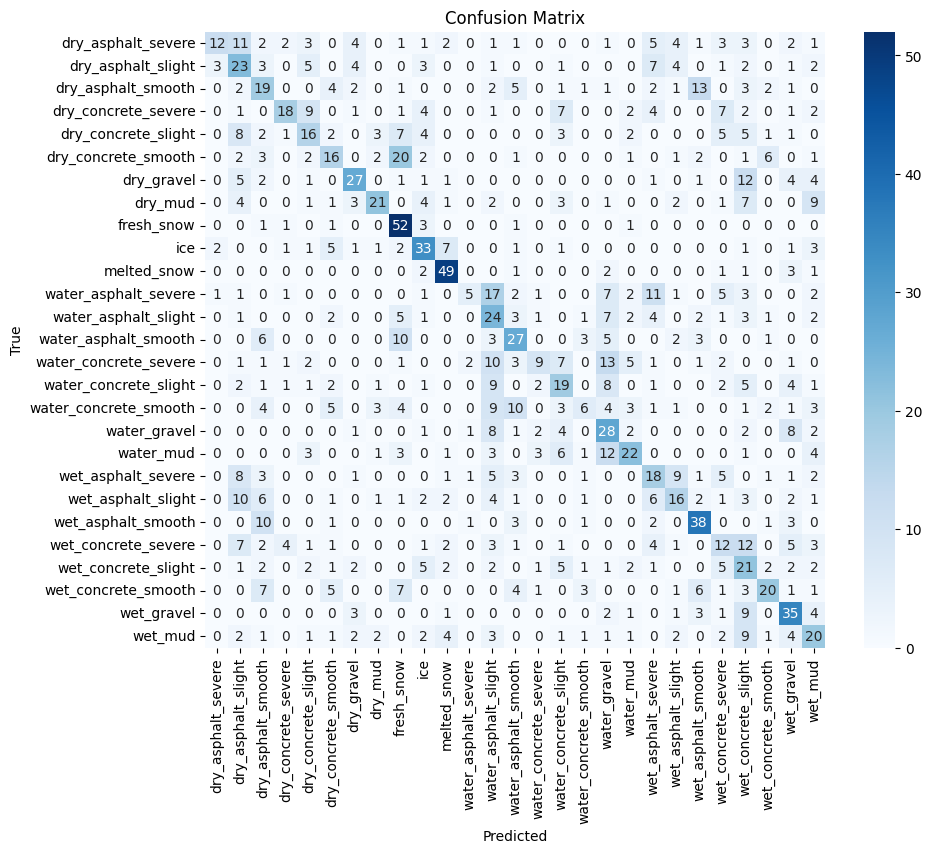

                       precision    recall  f1-score   support

   dry_asphalt_severe       0.67      0.20      0.31        60
   dry_asphalt_slight       0.26      0.38      0.31        60
   dry_asphalt_smooth       0.25      0.32      0.28        60
  dry_concrete_severe       0.60      0.30      0.40        60
  dry_concrete_slight       0.33      0.27      0.30        60
  dry_concrete_smooth       0.33      0.27      0.30        60
           dry_gravel       0.53      0.45      0.49        60
              dry_mud       0.60      0.35      0.44        60
           fresh_snow       0.45      0.87      0.59        60
                  ice       0.46      0.55      0.50        60
          melted_snow       0.67      0.82      0.74        60
 water_asphalt_severe       0.50      0.08      0.14        60
 water_asphalt_slight       0.22      0.40      0.29        60
 water_asphalt_smooth       0.40      0.45      0.42        60
water_concrete_severe       0.45      0.15      0.23  

In [21]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Load the test data
test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Get the paths of the test images
test_paths = test_generator.filepaths

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Get predicted probability values for each class
predicted_probabilities = predictions

# Plot images and their predicted probabilities
plt.figure(figsize=(20, 10))
for i in range(min(30, len(true_classes))):
    plt.subplot(5, 6, i+1)
    img_path = test_paths[i]
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title("True: " + class_labels[true_classes[i]] + "\nPredicted: " + class_labels[predicted_classes[i]])
    plt.axis('off')
plt.show()

# Print predicted probability values for each class
for i in range(len(true_classes)):
    print("True Class:", class_labels[true_classes[i]])
    print("Predicted Class:", class_labels[predicted_classes[i]])
    print("Predicted Probabilities:")
    for j in range(len(class_labels)):
        print(class_labels[j], ":", predicted_probabilities[i][j])
    print()

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Found 1620 images belonging to 27 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step


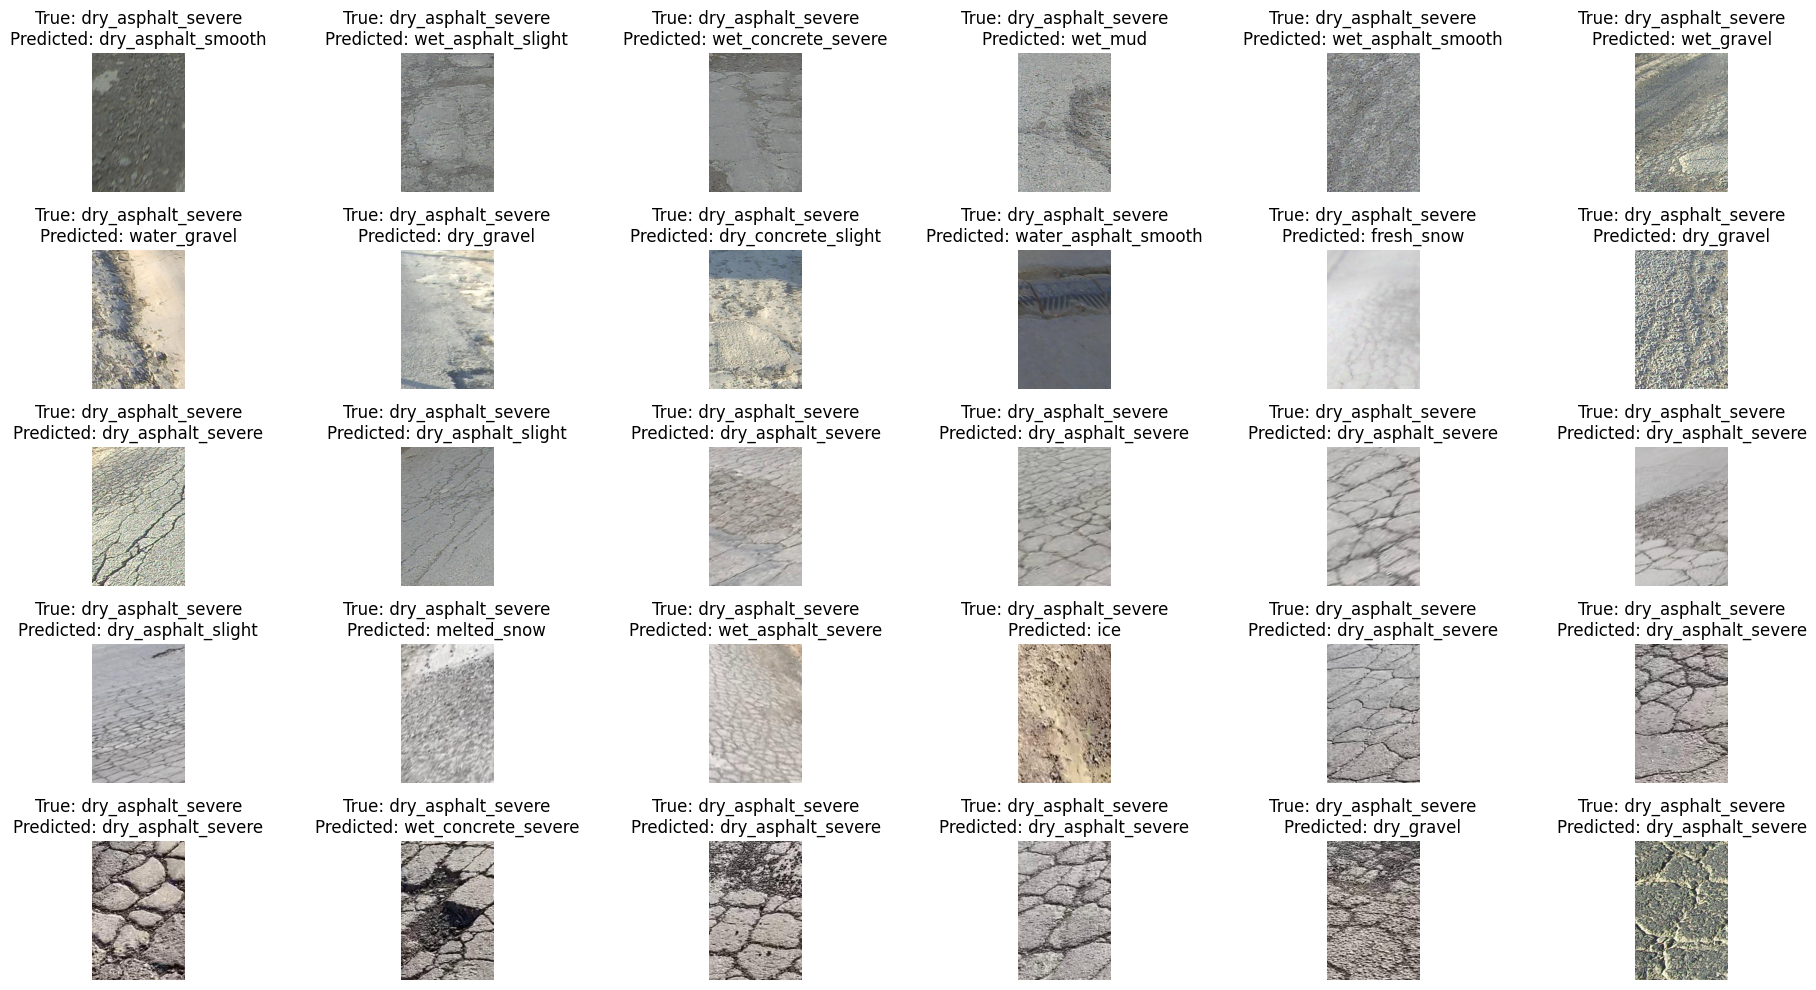

Streaming output truncated to the last 5000 lines.
wet_asphalt_severe : 0.04522143
wet_asphalt_slight : 0.036391553
wet_asphalt_smooth : 0.08624648
wet_concrete_severe : 0.014248249
wet_concrete_slight : 0.010018126
wet_concrete_smooth : 0.04020607
wet_gravel : 0.005827022
wet_mud : 0.032480113

True Class: wet_concrete_smooth
Predicted Class: wet_concrete_smooth
Predicted Probabilities:
dry_asphalt_severe : 0.0035253693
dry_asphalt_slight : 0.010827194
dry_asphalt_smooth : 0.022439217
dry_concrete_severe : 0.0024836322
dry_concrete_slight : 0.0050788657
dry_concrete_smooth : 0.19572972
dry_gravel : 0.00029324752
dry_mud : 0.0032377967
fresh_snow : 0.020241411
ice : 0.0071379947
melted_snow : 0.00023609042
water_asphalt_severe : 0.006871454
water_asphalt_slight : 0.046128374
water_asphalt_smooth : 0.082336985
water_concrete_severe : 0.011599964
water_concrete_slight : 0.0063420082
water_concrete_smooth : 0.23243952
water_gravel : 0.00928202
water_mud : 0.0093610035
wet_asphalt_severe :

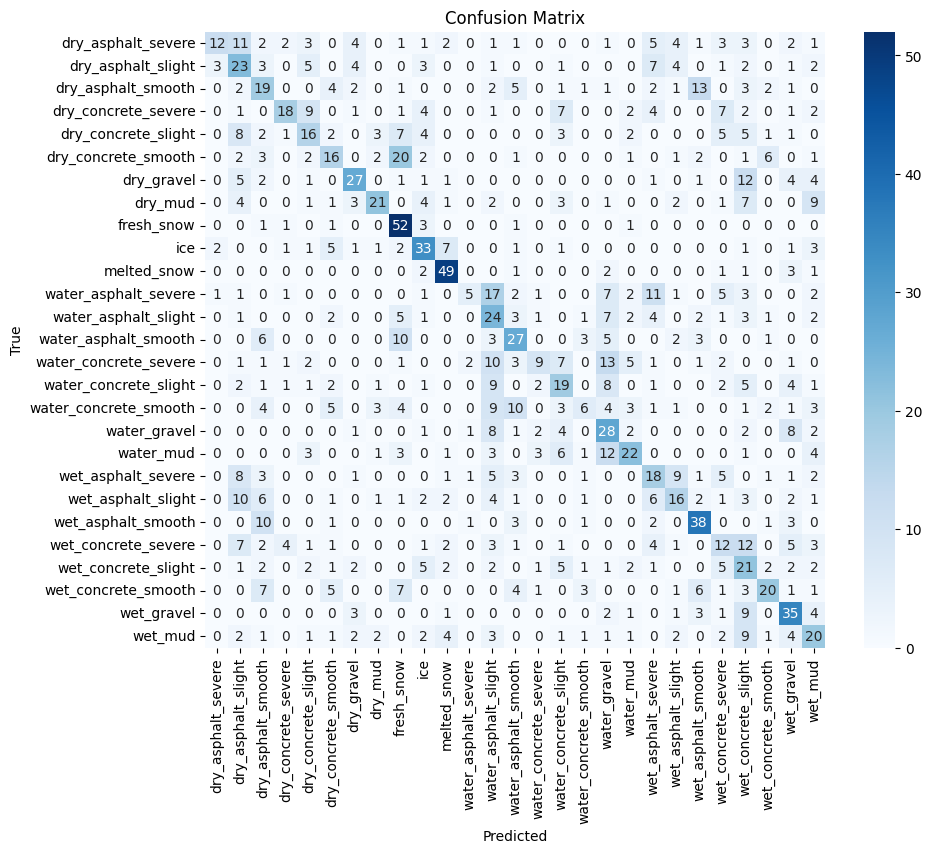

                       precision    recall  f1-score   support

   dry_asphalt_severe       0.67      0.20      0.31        60
   dry_asphalt_slight       0.26      0.38      0.31        60
   dry_asphalt_smooth       0.25      0.32      0.28        60
  dry_concrete_severe       0.60      0.30      0.40        60
  dry_concrete_slight       0.33      0.27      0.30        60
  dry_concrete_smooth       0.33      0.27      0.30        60
           dry_gravel       0.53      0.45      0.49        60
              dry_mud       0.60      0.35      0.44        60
           fresh_snow       0.45      0.87      0.59        60
                  ice       0.46      0.55      0.50        60
          melted_snow       0.67      0.82      0.74        60
 water_asphalt_severe       0.50      0.08      0.14        60
 water_asphalt_slight       0.22      0.40      0.29        60
 water_asphalt_smooth       0.40      0.45      0.42        60
water_concrete_severe       0.45      0.15      0.23  

In [22]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Load the test data
test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Get the paths of the test images
test_paths = test_generator.filepaths

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Get predicted probability values for each class
predicted_probabilities = predictions

# Plot images and their predicted probabilities
fig, axs = plt.subplots(5, 6, figsize=(20, 10))
for i in range(min(30, len(true_classes))):
    ax = axs[i // 6, i % 6]
    img_path = test_paths[i]
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(f"True: {class_labels[true_classes[i]]}\nPredicted: {class_labels[predicted_classes[i]]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Print predicted probability values for each class
for i in range(len(true_classes)):
    print("True Class:", class_labels[true_classes[i]])
    print("Predicted Class:", class_labels[predicted_classes[i]])
    print("Predicted Probabilities:")
    for j in range(len(class_labels)):
        print(class_labels[j], ":", predicted_probabilities[i][j])
    print()

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))